# Continut
## [1. Random Forest pentru sarcini de clasificare](#clasificare)
### [1.1. Importul si explorarea datelor](#11)
### [1.2. Formarea seturilor de date](#12)
### [1.3. Modelul RandomForestClassifier implicit](#13)
### [1.4. Hiper-parametri ai algoritmului RandomForestClassifier](#14)
## [2. Random Forest pentru sarcini de regresie](#regresie)
### [2.1. Importul si explorarea datelor, formarea seturilor](#21)
### [2.2. Modelul RandomForestRegressor implicit](#22)
### [2.3. Hiper-parametri ai algoritmului RandomForestRegressor](#23)
## [3. Random Forest versus alte algoritme pentru sarcini de regresie](#versus)

<a id='clasificare'></a>
# 1. Random Forest pentru sarcini de clasificare

<a id='11'></a>
## 1.1. Importul si explorarea datelor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importul datelor
df = pd.read_csv("data_banknote_authentication.csv")

In [3]:
df

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
# vizualizarea informației despre date df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


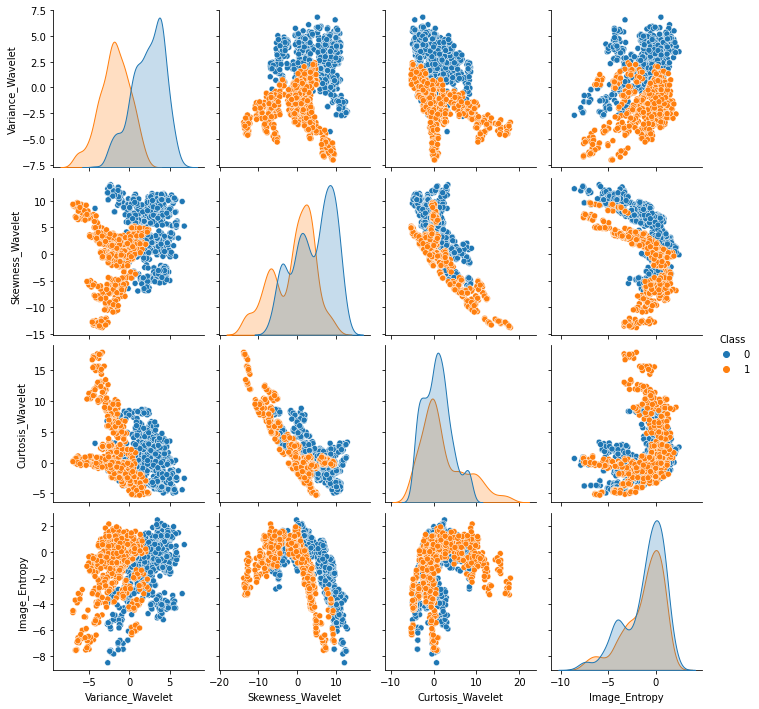

In [5]:
# vizualizarea dependentelor dintre caracteristici in functie de coloana label sns.pairplot(df,hue='col_label')
sns.pairplot(df,hue='Class');

<a id='12'></a>
## 1.2. Formarea seturilor de date

In [6]:
# crearea setului X X=df.drop(col_label, axis=1)
X = df.drop("Class",axis=1)

In [7]:
# crearea setului y y=df[col_label]
y = df["Class"]

In [8]:
# crearea seturilor de train si de test 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

<a id='13'></a>
## 1.3. Modelul RandomForestClassifier implicit

In [9]:
#importul algoritmului RandomForestClassifier from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [10]:
# crearea modelului RandomForestClassifier de bază model = RandomForestClassifier(random_state=9)
model = RandomForestClassifier(random_state=9)

In [11]:
# ajustarea modelului pe datele de training model.fit(X_train, y_train)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=9)

In [12]:
# realizarea predicției model.predict(X_test)
y_pred=model.predict(X_test)

In [13]:
# importul functiilor de evaluare a clasificarii
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

In [14]:
# determinarea acurateti modelului accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9854545454545455

In [15]:
# determinarea confusion matrix a modelului confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[145,   2],
       [  2, 126]], dtype=int64)

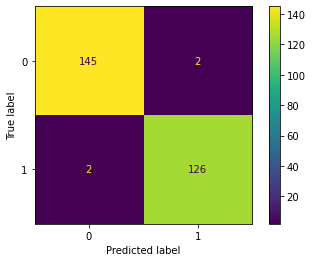

In [16]:
# vizualizarea grafica a confusion matrix a modelului ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=model.classes_).plot();
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=model.classes_).plot();

In [17]:
# elaborarea classificasion report a modelului print(classification_report(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       147
           1       0.98      0.98      0.98       128

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [18]:
# determinarea importantei fiecarei caracteristici model.feature_importances_
model.feature_importances_

array([0.56076844, 0.23203108, 0.15286091, 0.05433957])

<a id='14'></a>
## 1.4. Hiper-parametri ai algoritmului RandomForestClassifier

In [19]:
#crearea repetata a modelului RandomForestClassifier de bază model = RandomForestClassifier(random_state=9)
model = RandomForestClassifier(random_state=9)

In [20]:
# Crearea dicționarului cu diferite valori a hiper-parametrilor analizați param_grid
param_grid = {'n_estimators':[64,100,128,200],
             'max_features':[2,3,4],
             'bootstrap':[True,False],
             'oob_score':[True,False]}  # oob_score are sens doar daca bootstrap=True

In [21]:
# Importul modelului GhidSearchCV from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [22]:
# Crearea modelului GhidSearchCV grid = GridSearchCV(model,param_grid)
grid = GridSearchCV(model,param_grid)

In [23]:
# ajustarea modelului pe datele de training grid.fit(X_train, y_train)
grid.fit(X_train, y_train)

C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarn

GridSearchCV(estimator=RandomForestClassifier(random_state=9),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [24]:
# vizualizarea parametrilor cei mai buni grid.best_params_
grid.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

In [25]:
# realizarea predicției grid.predict(X_test)
y_pred=grid.predict(X_test)

In [26]:
# determinarea acurateti modelului accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9781818181818182

In [27]:
# determinarea confusion matrix a modelului confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[145,   2],
       [  4, 124]], dtype=int64)

In [28]:
# elaborarea classificasion report a modelului print(classification_report(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       147
           1       0.98      0.97      0.98       128

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [29]:
#crearea modelului RandomForestClassifier cu parametrii bootstrap=True si oob_score=True 
model = RandomForestClassifier(bootstrap=True, max_features=2, n_estimators=64, oob_score=True, random_state=9)

In [30]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True,
                       random_state=9)

In [31]:
y_pred=grid.predict(X_test)

In [32]:
# vizualizarea parametrului oob_score_  model.oob_score_ 
model.oob_score_

0.9927073837739289

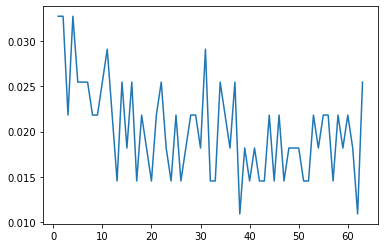

In [33]:
# determinarea hiperparametrului n_estimators prin metoda cotului
erori = []
nr_clasif_gresite = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_gresit = np.sum(preds != y_test)
    erori.append(err)
    nr_clasif_gresite.append(n_gresit)

plt.plot(range(1,64), erori);

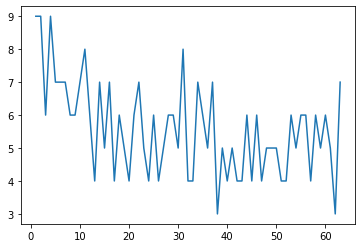

In [34]:
plt.plot(range(1,64), nr_clasif_gresite)

<a id='regresie'></a>
# 2. Random Forest pentru sarcini de regresie

<a id='21'></a>
## 2.1. Importul si explorarea datelor, formarea seturilor

In [35]:
df = pd.read_csv("rock_density_xray.csv")

In [36]:
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [37]:
# redenumirea coloanelor
df.columns=['Signal',"Density"]

In [38]:
df

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


<AxesSubplot:xlabel='Signal', ylabel='Density'>

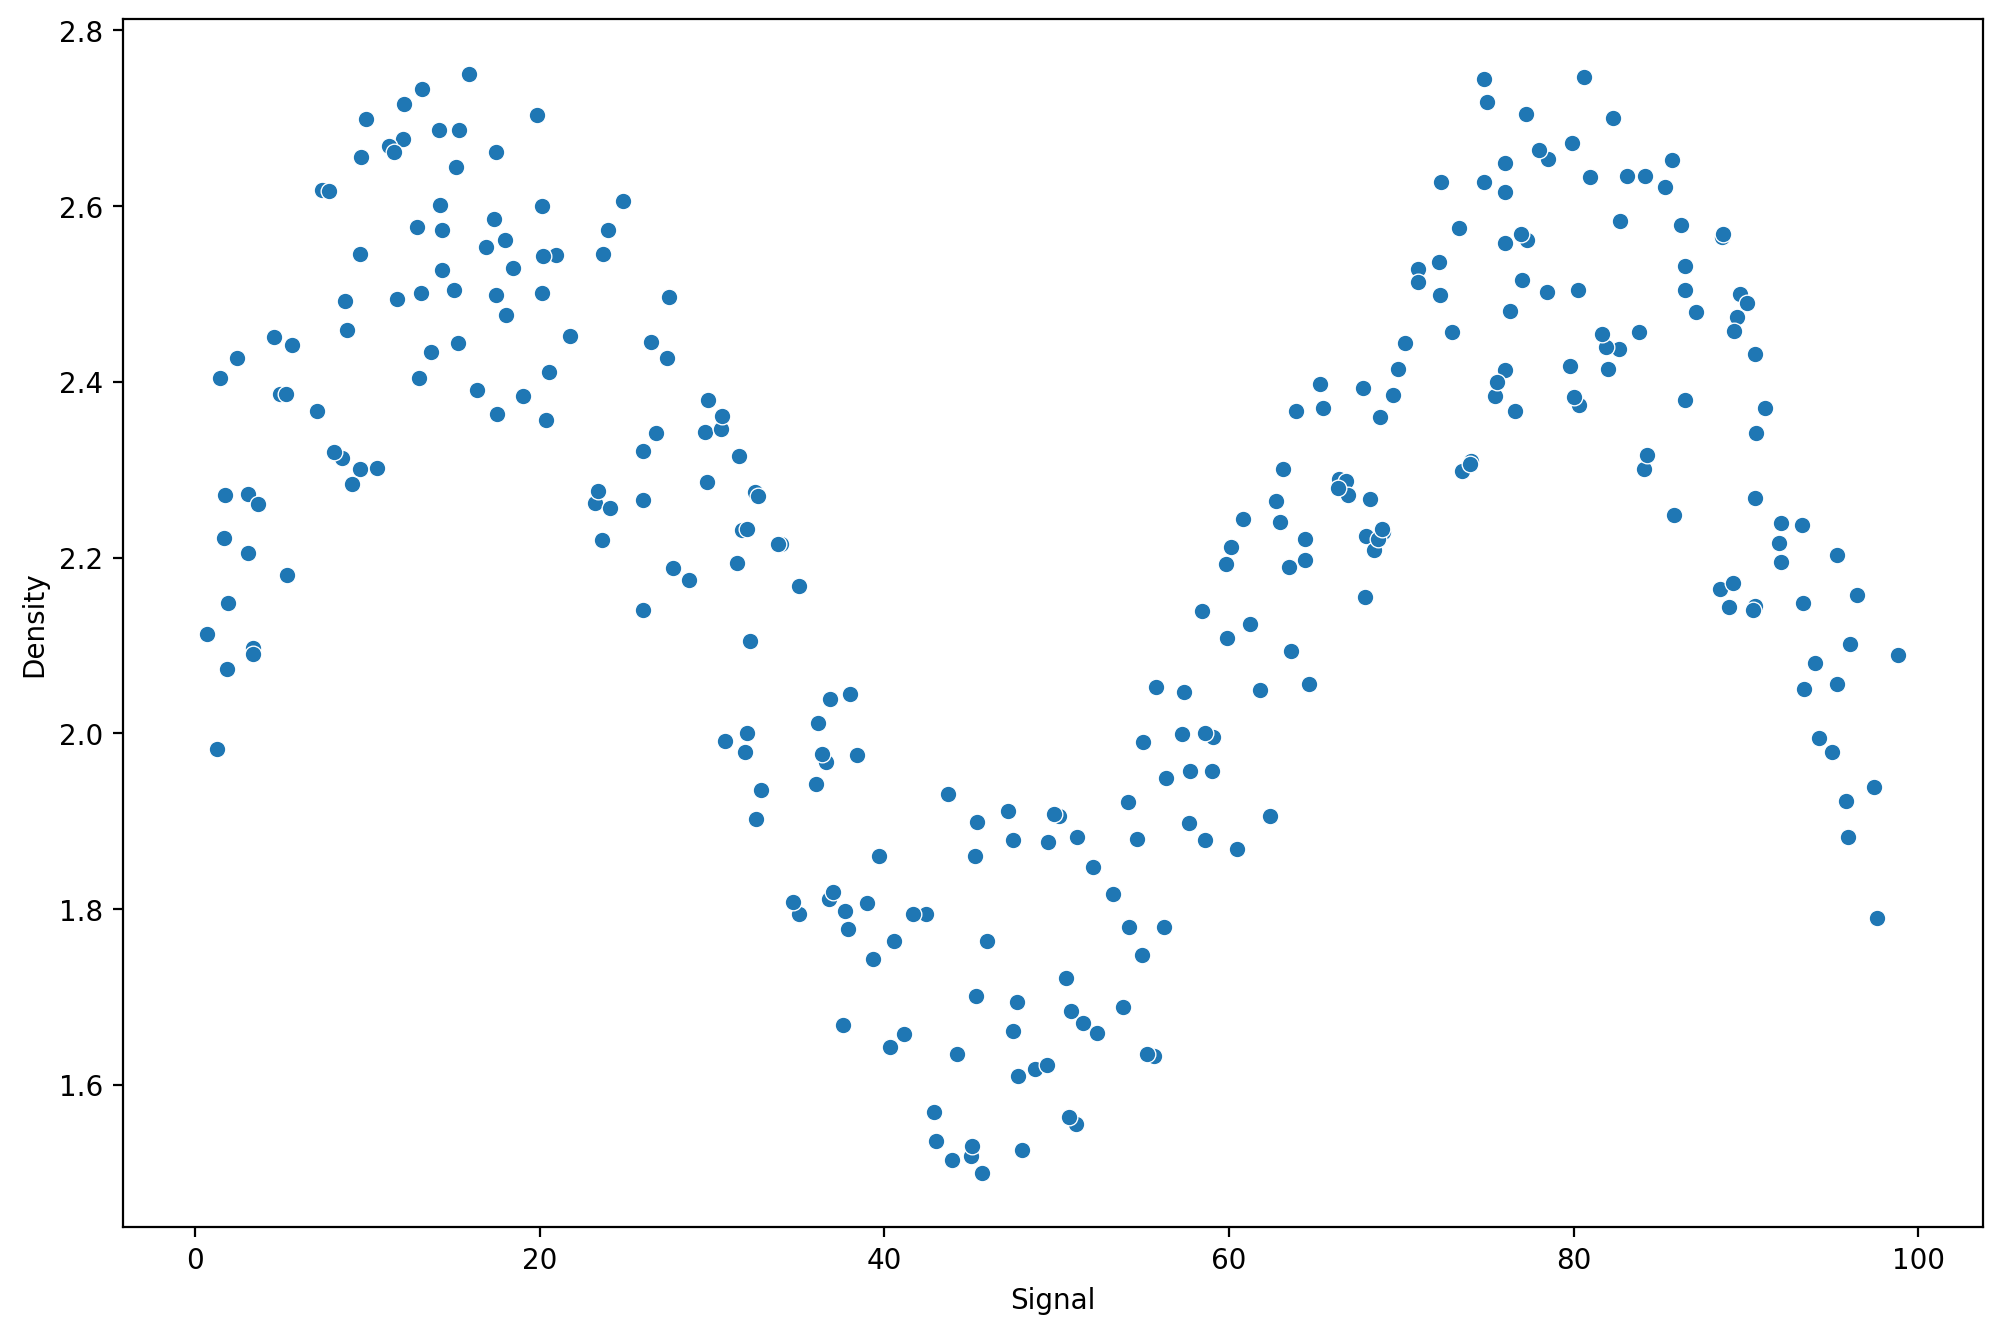

In [39]:
# vizualizarea dependentei dintre coloane sns.scatterplot(x=col1,y=col2,data=df)
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [40]:
# crearea setului X 
X = df['Signal']

In [41]:
# scalara valorilor lui X (o singura coloana) in gama -1...1  X = X.values.reshape(-1,1)
X = X.values.reshape(-1,1)

In [42]:
# crearea setului y y=df[col_label]
y = df['Density']

In [43]:
# crearea seturilor de train si de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)

<a id='22'></a>
## 2.2. Modelul RandomForestRegressor implicit

In [44]:
# importul algoritmului RandomForestRegressor from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimato

In [45]:
# crearea modelului RandomForestRegressor de bază model = RandomForestRegressor(random_state=9)
model = RandomForestRegressor(random_state=9)

In [46]:
# ajustarea modelului pe datele de training model.fit(X_train, y_train)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=9)

In [47]:
# realizarea predicției model.predict(X_test)
y_pred = model.predict(X_test)

In [48]:
# importul functiilor de evaluare
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [49]:
# determinarea erorii medii absolute mean_absolute_error(y_test,y_pred)
mean_absolute_error(y_test,y_pred)

0.13975102712867943

In [50]:
# determinarea valorii medii a y_test
np.mean(y_test)

2.2902642453346034

In [51]:
# determinarea rădăcinii erorii medii pătratice np.sqrt(mean_squared_error(y_test,y_pred))
np.sqrt(mean_squared_error(y_test,y_pred))

0.16102913686228212

<a id='23'></a>
## 2.3. Hiper-parametri ai algoritmului RandomForestRegressor

In [52]:
# crearea repetata a modelului RandomForestRegressor de bază model = RandomForestRegressor(random_state=9)
model = RandomForestRegressor(random_state=9)

In [53]:
# Crearea dicționarului cu diferite valori a hiper-parametrilor analizați param_grid
param_grid = {'n_estimators':[64,100,128,200],
             'bootstrap':[True,False],
             'oob_score':[True,False]}  # oob_score are sens doar daca bootstrap=True

In [54]:
# Crearea modelului GhidSearchCV grid = GridSearchCV(model,param_grid)
grid = GridSearchCV(model,param_grid)

In [55]:
# ajustarea modelului pe datele de training grid.fit(X_train, y_train)
grid.fit(X_train, y_train)

C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nicolaev\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarni

GridSearchCV(estimator=RandomForestRegressor(random_state=9),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [56]:
# vizualizarea parametrilor cei mai buni grid.best_params_
grid.best_params_

{'bootstrap': True, 'n_estimators': 200, 'oob_score': True}

In [57]:
# realizarea predicției grid.predict(X_test)
y_pred=grid.predict(X_test)

In [58]:
# determinarea erorii medii absolute mean_absolute_error(y_test,y_pred)
mean_absolute_error(y_test,y_pred)

0.14031246220741783

In [59]:
# determinarea rădăcinii erorii medii pătratice np.sqrt(mean_squared_error(y_test,y_pred))
np.sqrt(mean_squared_error(y_test,y_pred))

0.16232784298685232

<a id='versus'></a>
# 3. Random Forest versus alte algoritme pentru sarcini de regresie

<a id='31'></a>
## 3.1. Algoritmul LinearRegression liniar

In [60]:
#crearea unei funcții de ajustare a modelului, realizarea a predicției, determinare a erorii și afișare a 
# graficului comparativ  executie_model
def executie_model(model,X_train,y_train,X_test,y_test):
    
    # ajustarea modelului
    model.fit(X_train,y_train)
    
    # realizarea predictiei
    y_pred = model.predict(X_test)
    
    #determinarea radacinii erorii medii patratice
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(f'RMSE : {rmse}')
    
    # predinctii a propriile date formate din numere de la 1 la 100
    gama_semnalului = np.arange(0,100)
    rezultat = model.predict(gama_semnalului.reshape(-1,1))
    
    # Afisarea rezultatelor
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(gama_semnalului,rezultat)

In [61]:
# importul algoritmului LinearRegression from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

In [62]:
# crearea modelului de baza RandomForestClassifier de bază model0 = LinearRegression()
model0 = LinearRegression()

RMSE : 0.2634074146693858


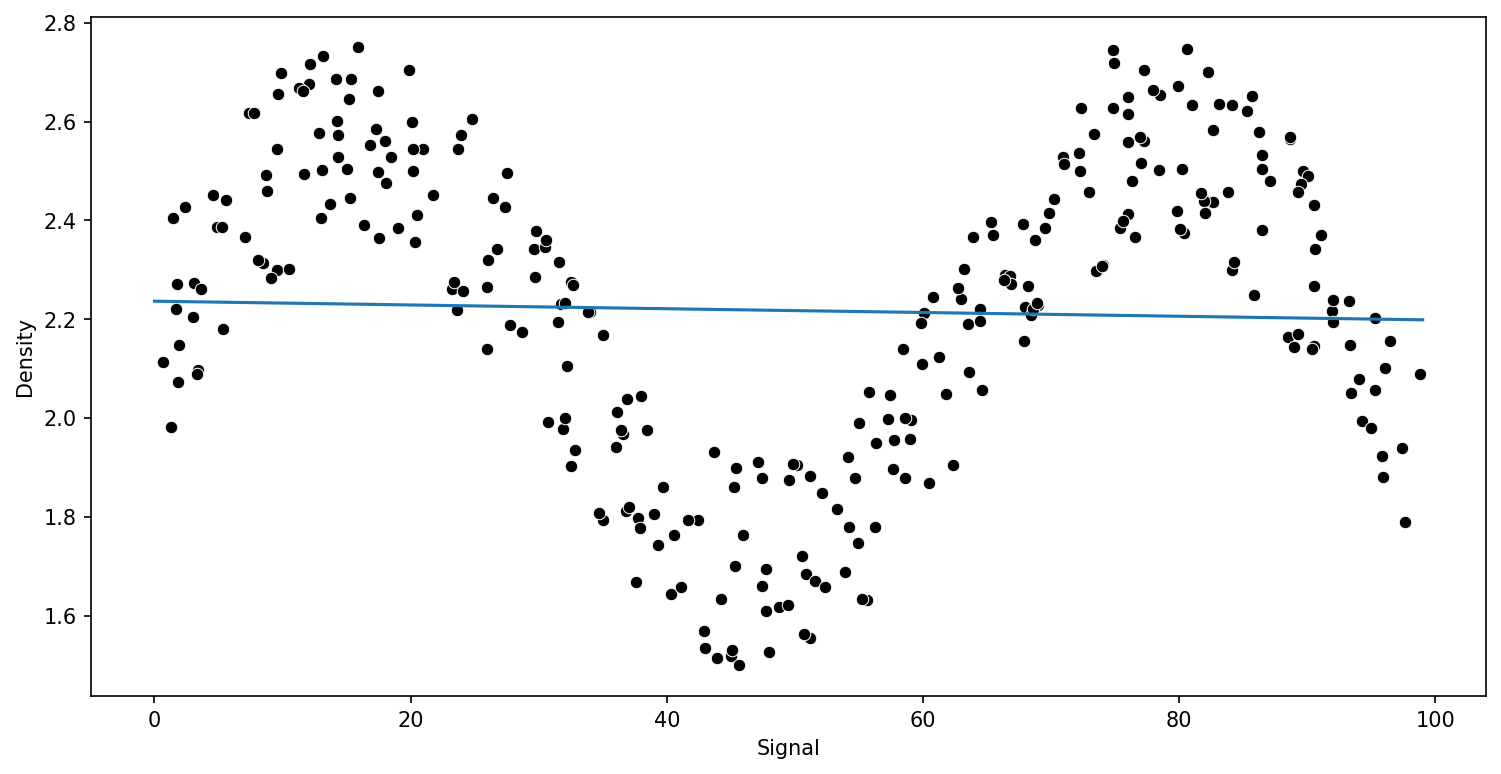

In [63]:
# aplicarea functiei executie_model asupra modelului LinearRegression liniar
executie_model(model0,X_train,y_train,X_test,y_test)

<a id='32'></a>
## 3.2. Algoritmul LinearRegression polinomial

In [64]:
# importul modulului pipeline pentru modelul liniar regression polinomial from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline

In [65]:
#importul modulului PolynomialFeatures pentru setarea gradului polinomului in pipeline
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [66]:
# crearea modelului LinearRegression polinomial de gradul 2 cu ajutorul pipeline
# model1 = make_pipeline(PolynomialFeatures(2),LinearRegression())
model1 = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.2424876301241407


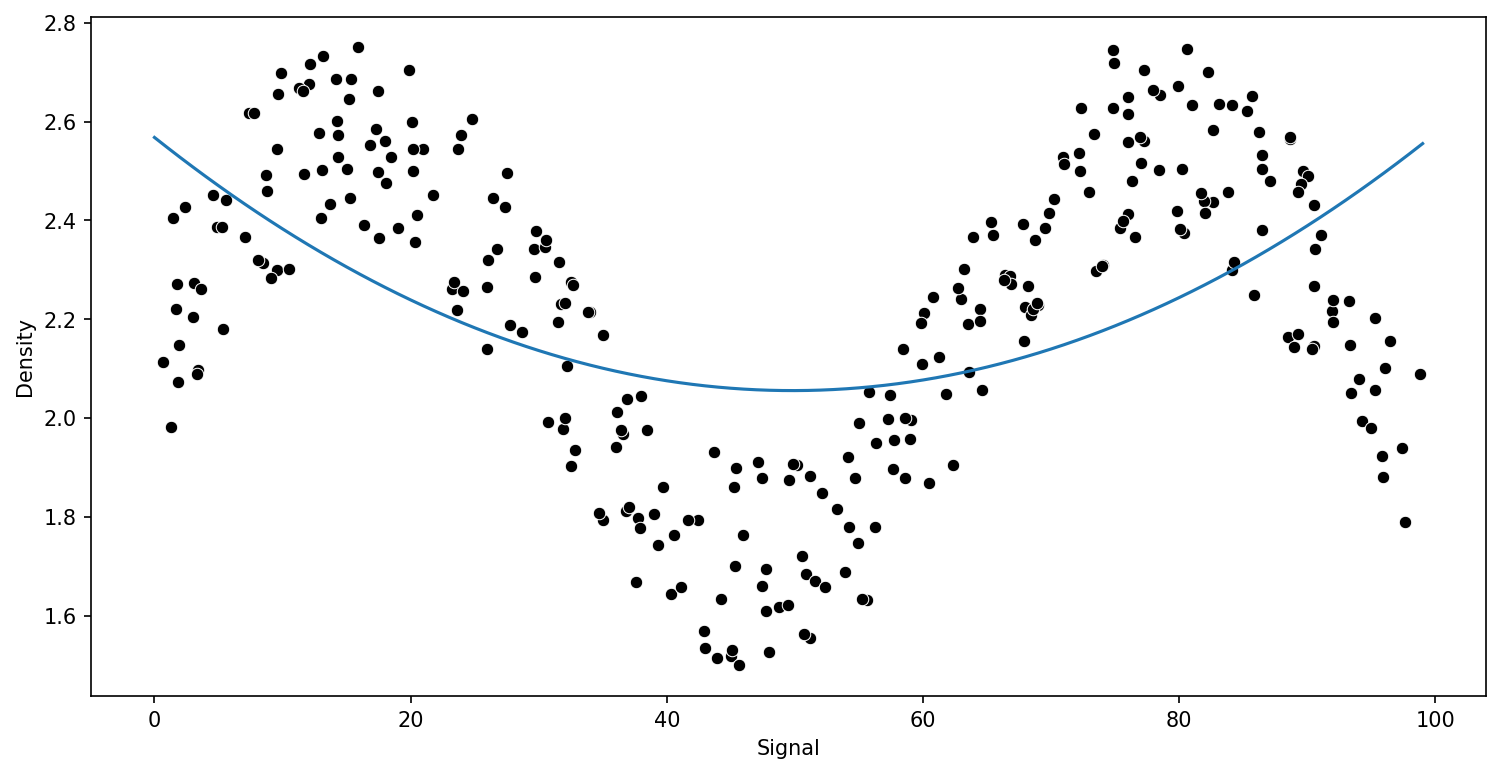

In [67]:
# aplicarea functiei executie_model asupra modelului LinearRegression polinomial de gradul 2
executie_model(model1,X_train,y_train,X_test,y_test)

In [68]:
# crearea modelului LinearRegression polinomial de gradul 10 cu ajutorul pipeline
model2 = make_pipeline(PolynomialFeatures(10),LinearRegression())

RMSE : 0.11478179282219154


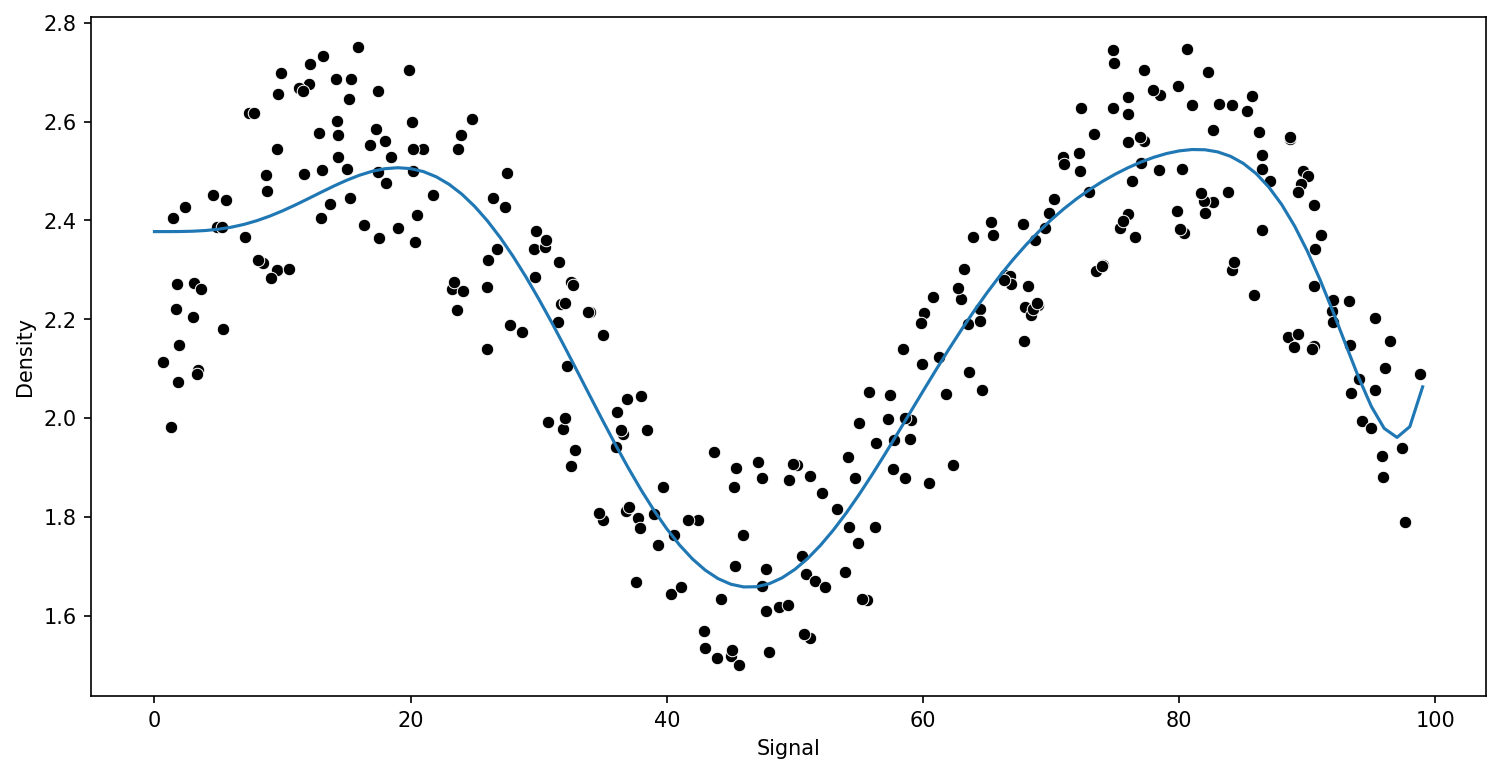

In [69]:
# aplicarea functiei executie_model asupra modelului LinearRegression polinomial de gradul 10
executie_model(model2,X_train,y_train,X_test,y_test)

<a id='33'></a>
## 3.3. Algoritmul KNN Regression

In [70]:
# importul algoritmului KNeighborsRegressor from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.18202928550567915
RMSE : 0.15675148767987004
RMSE : 0.13894811446189315


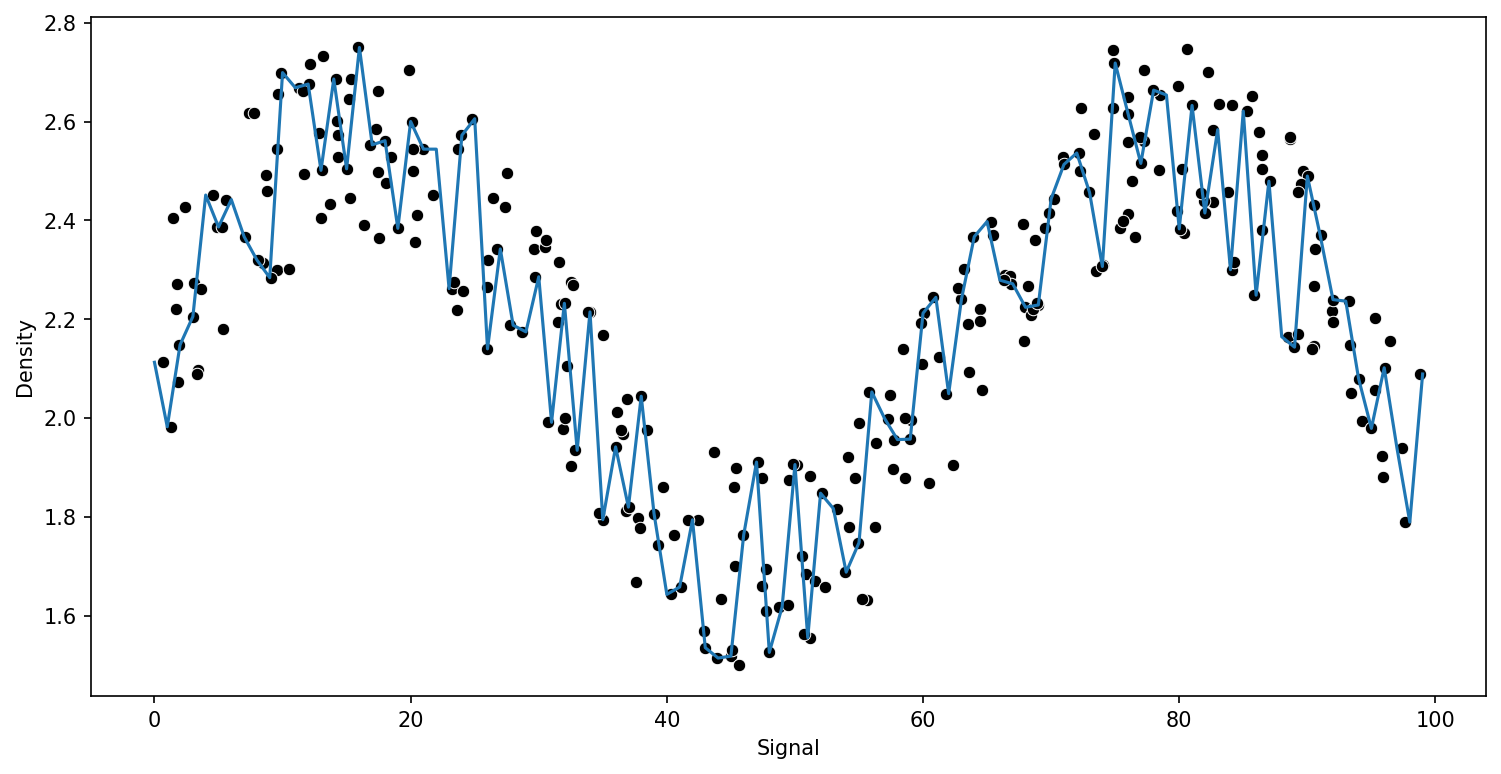

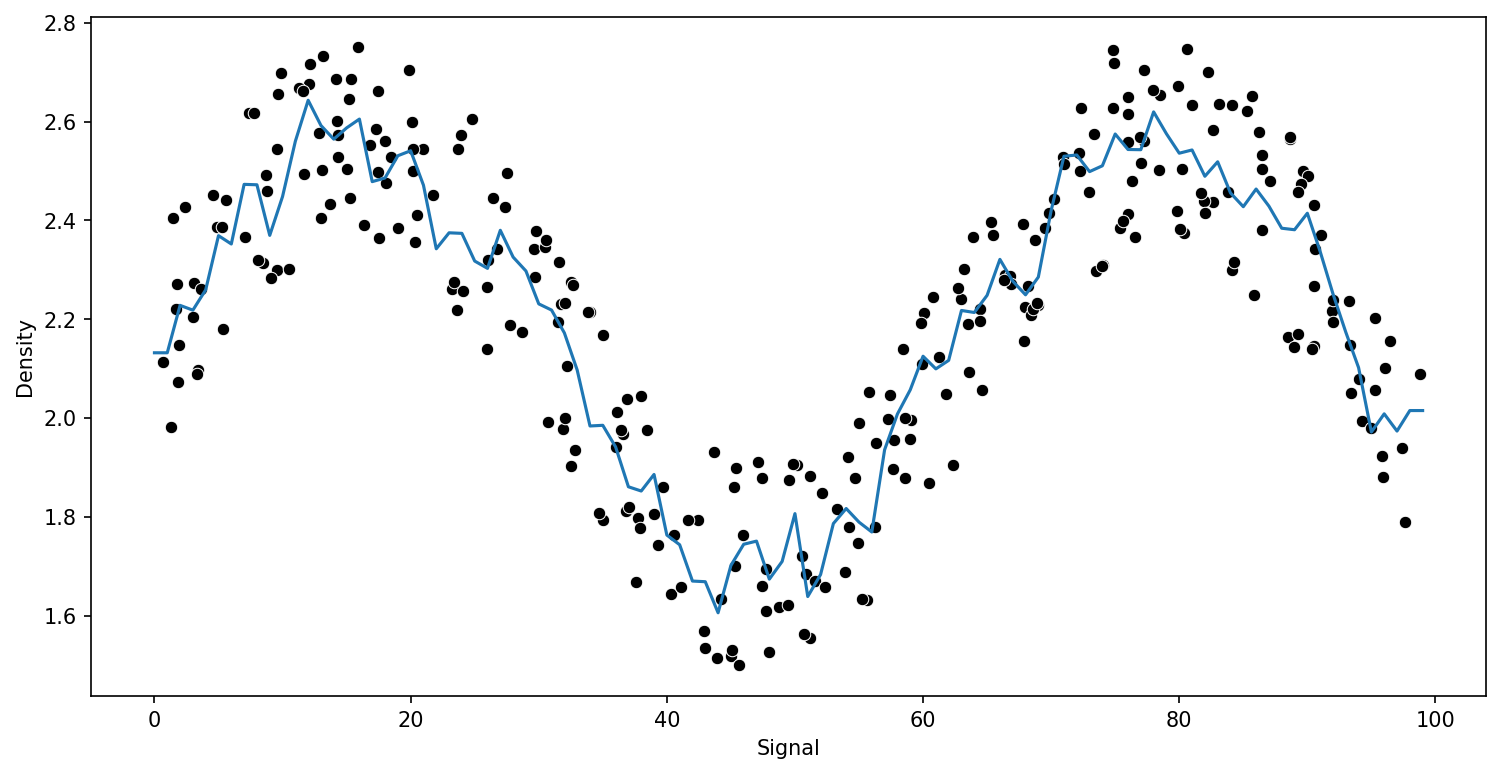

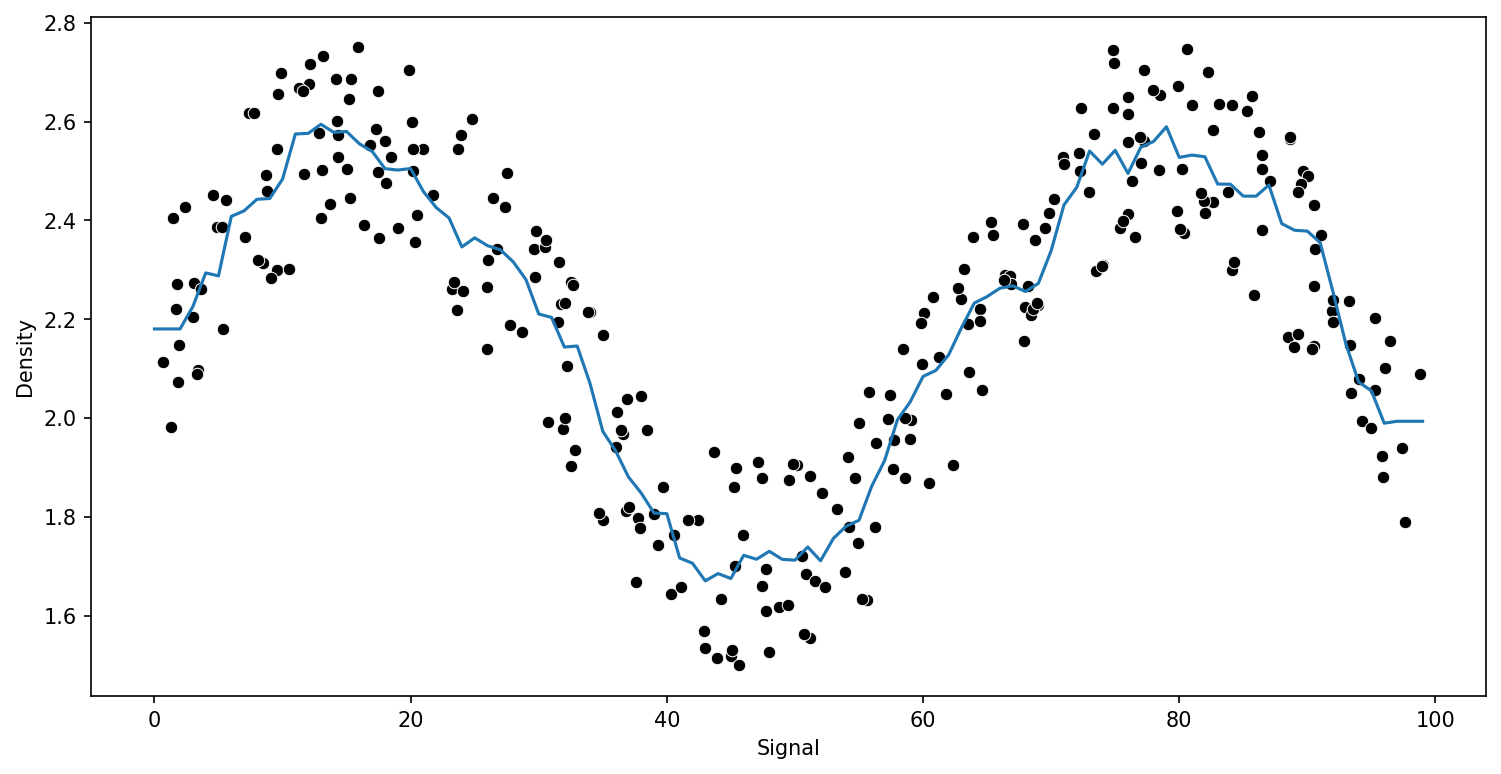

In [71]:
# crearea modelului KNeighborsRegressor pentru diferite valori a parametrului n_neighbors 
# model3 = KNeighborsRegressor(n_neighbors=n)
k_values = [1,5,10]
for n in k_values:
    
    
    model3 = KNeighborsRegressor(n_neighbors=n)
    executie_model(model3,X_train,y_train,X_test,y_test)

<a id='34'></a>
## 3.4. Algoritmul Support Vector Regression

In [72]:
# importul algoritmului SVR from sklearn.svm import SVR
from sklearn.svm import SVR

In [73]:
# crearea modelului SVR svr = SVR() 
svr = SVR() 

In [74]:
# importul modulului GhidSearchCV from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [75]:
# crearea dictionarului cu parametri pentru GhidSearchCV param_grid
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
              'gamma':['auto','scale']}

In [76]:
# crearea modelului GhidSearchCV pe baza modelului SVR model4 = GridSearchCV(svr,param_grid)
model4 = GridSearchCV(svr,param_grid)

RMSE : 0.12663145910459486


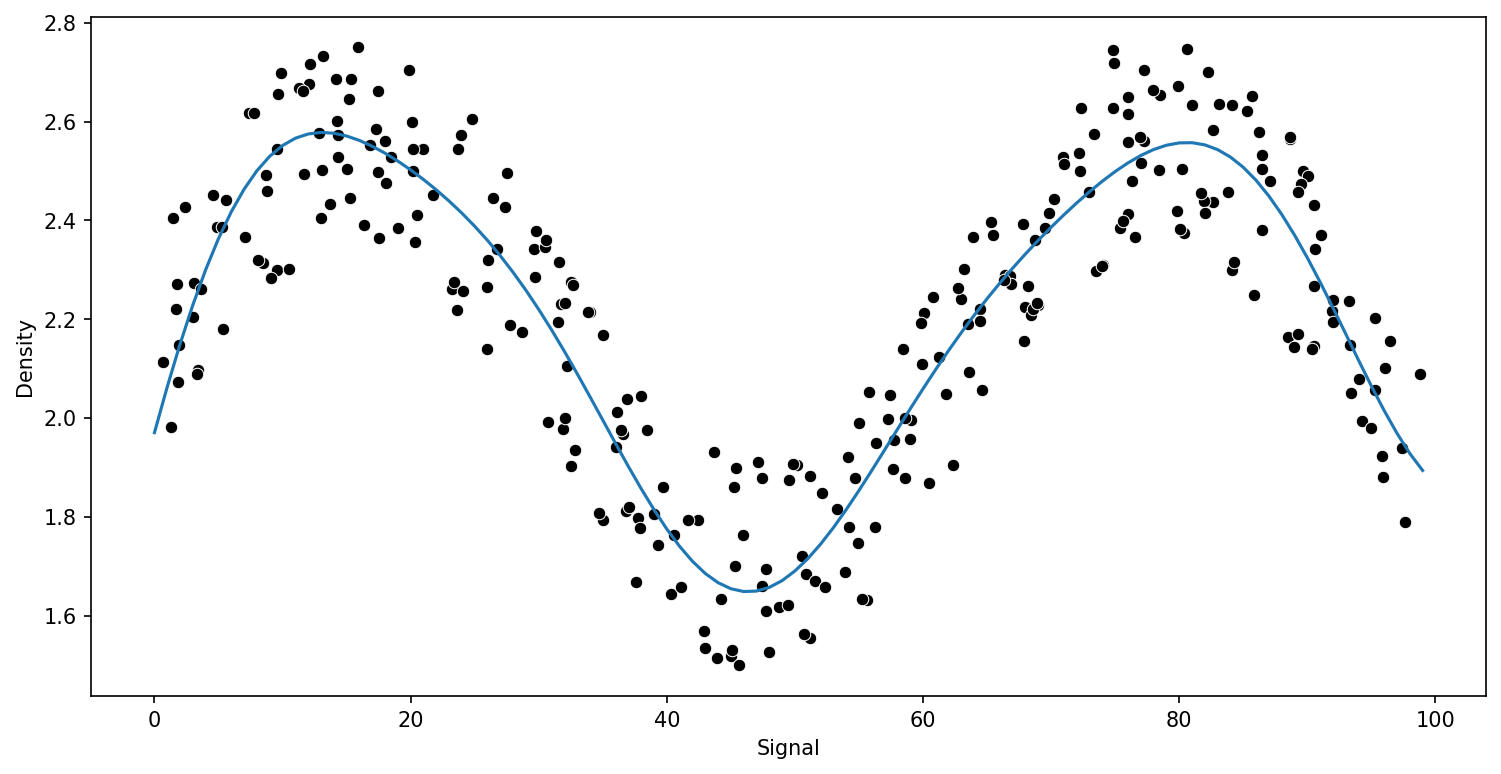

In [77]:
# aplicarea functiei executie_model asupra modelului GhidSearchCV
executie_model(model4,X_train,y_train,X_test,y_test)

In [78]:
model4.best_estimator_

SVR(C=1000)

<a id='35'></a>
## 3.5. Algoritmul Decision Tree Regression

In [79]:
# importul algoritmului DecisionTreeRegressor from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [80]:
# crearea modelului DecisionTreeRegressor model4= DecisionTreeRegressor()
model5= DecisionTreeRegressor()

RMSE : 0.18202928550567915


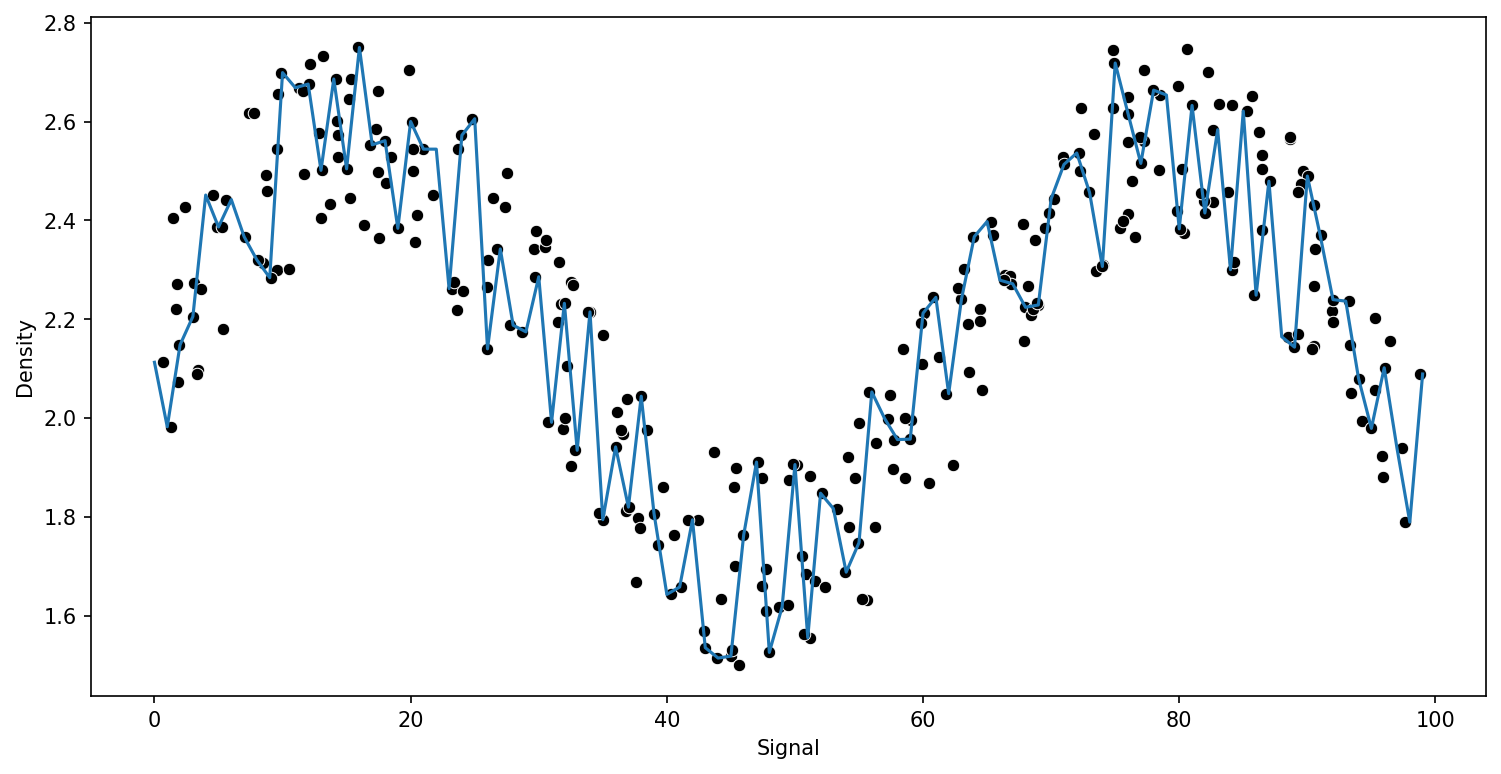

In [81]:
# aplicarea functiei executie_model asupra modelului DecisionTreeRegressor
executie_model(model5,X_train,y_train,X_test,y_test)

<a id='36'></a>
## 3.6. Algoritmul Random Forest Regression

In [82]:
# importul algoritmului RandomForestRegressor from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.16260663010608326
RMSE : 0.1644756568258315
RMSE : 0.16102913686228212


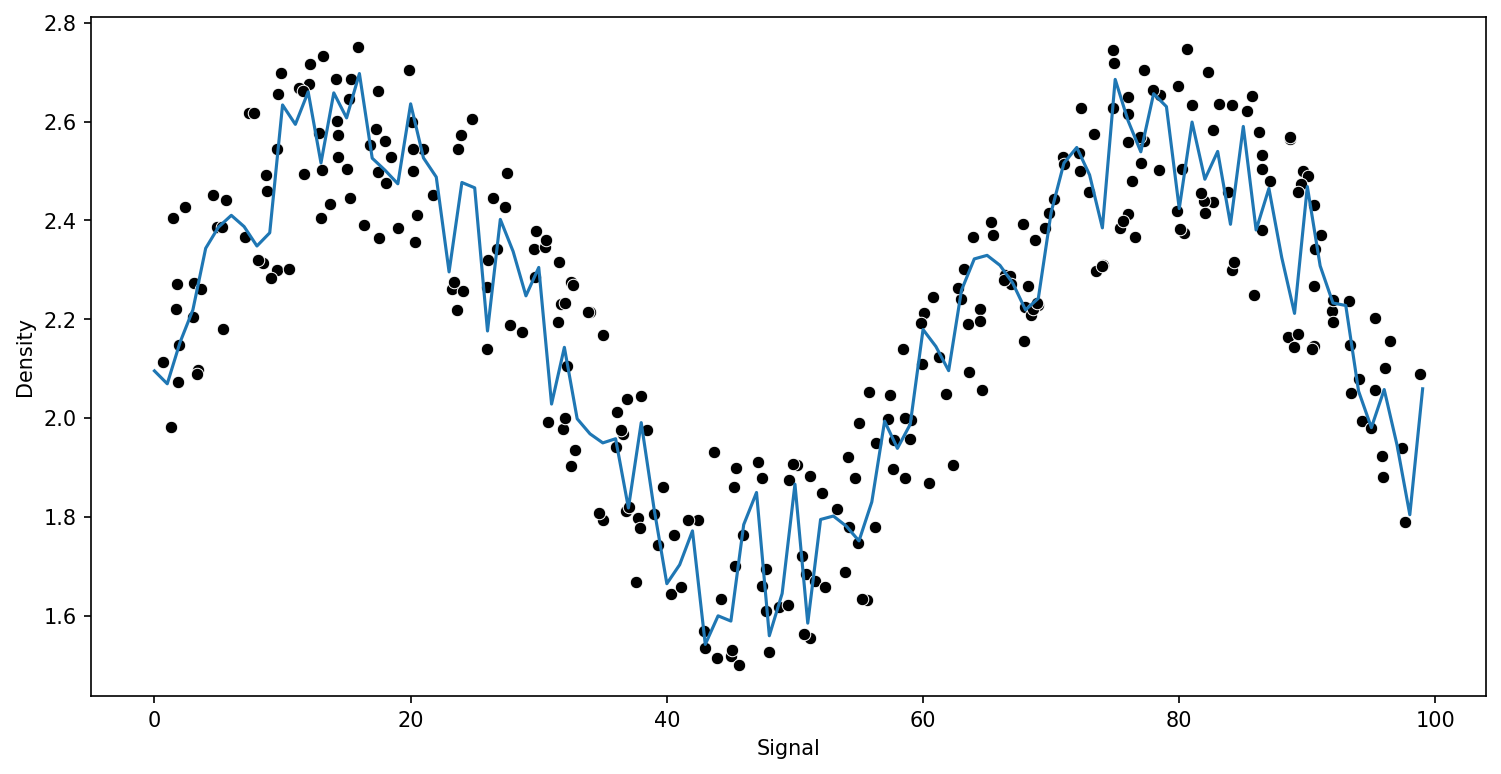

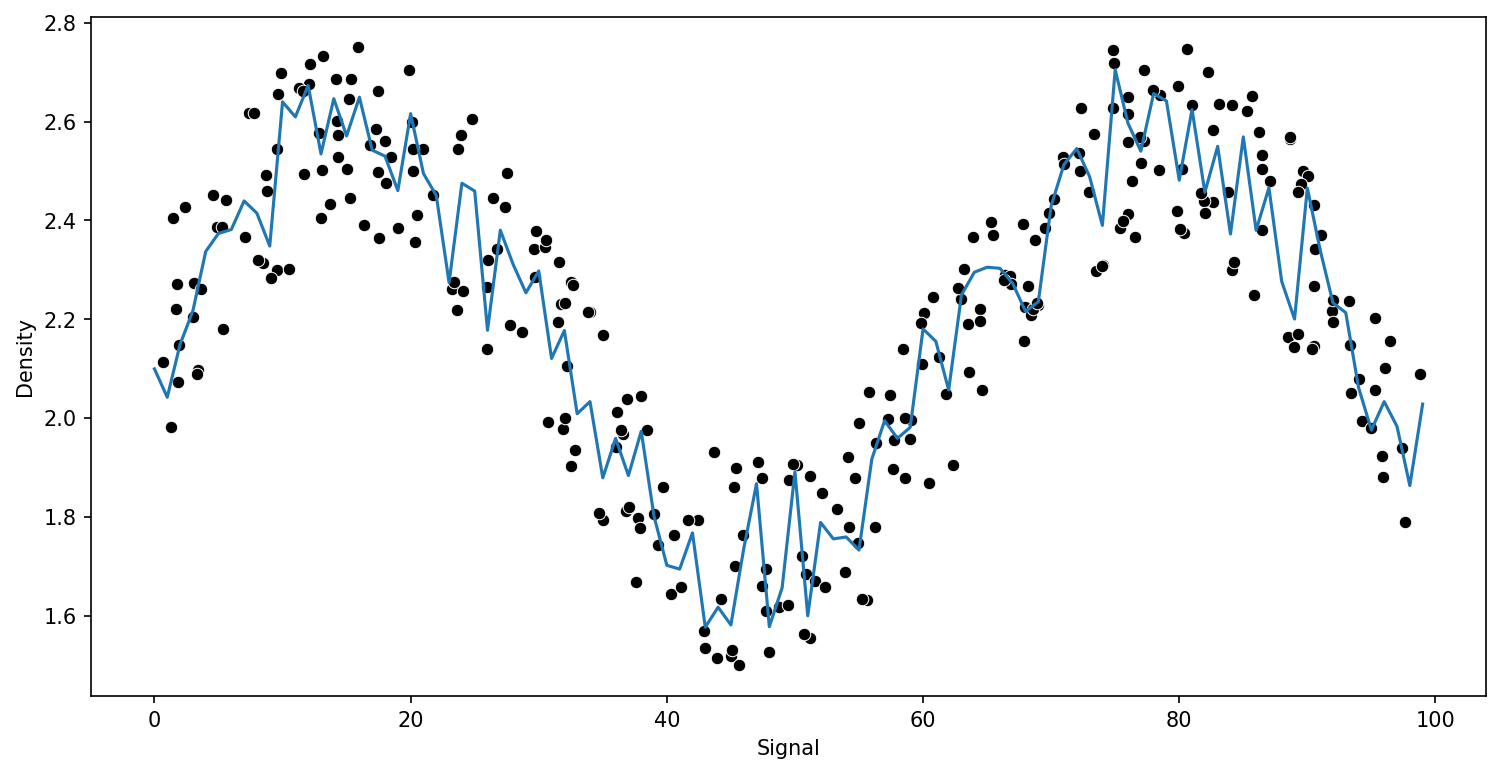

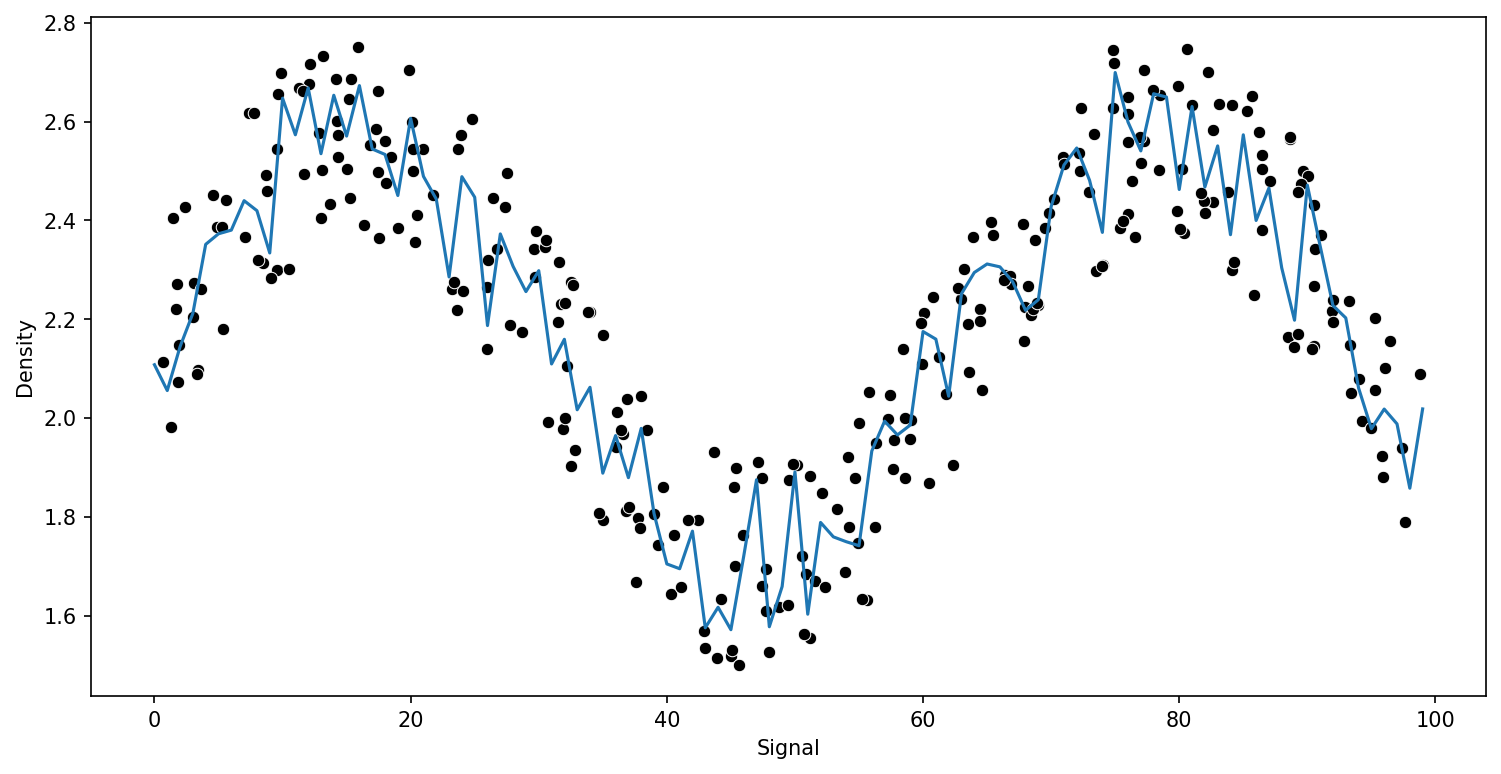

In [83]:
# crearea modelului RandomForestRegressor pentru diferite valori a parametrului n_estimators
# model6 = RandomForestRegressor(n_estimators=n) 
trees = [10,50,100]
for n in trees:
    
    model6 = RandomForestRegressor(n_estimators=n, random_state=9)
    executie_model(model6,X_train,y_train,X_test,y_test)

<a id='37'></a>
## 3.7. Algoritmul Gradient Boosting

In [84]:
# importul algoritmului GradientBoostingRegressor from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [85]:
#crearea modelului GradientBoostingRegressor implicit model7= GradientBoostingRegressor()
model7= GradientBoostingRegressor()

RMSE : 0.1499747032445641


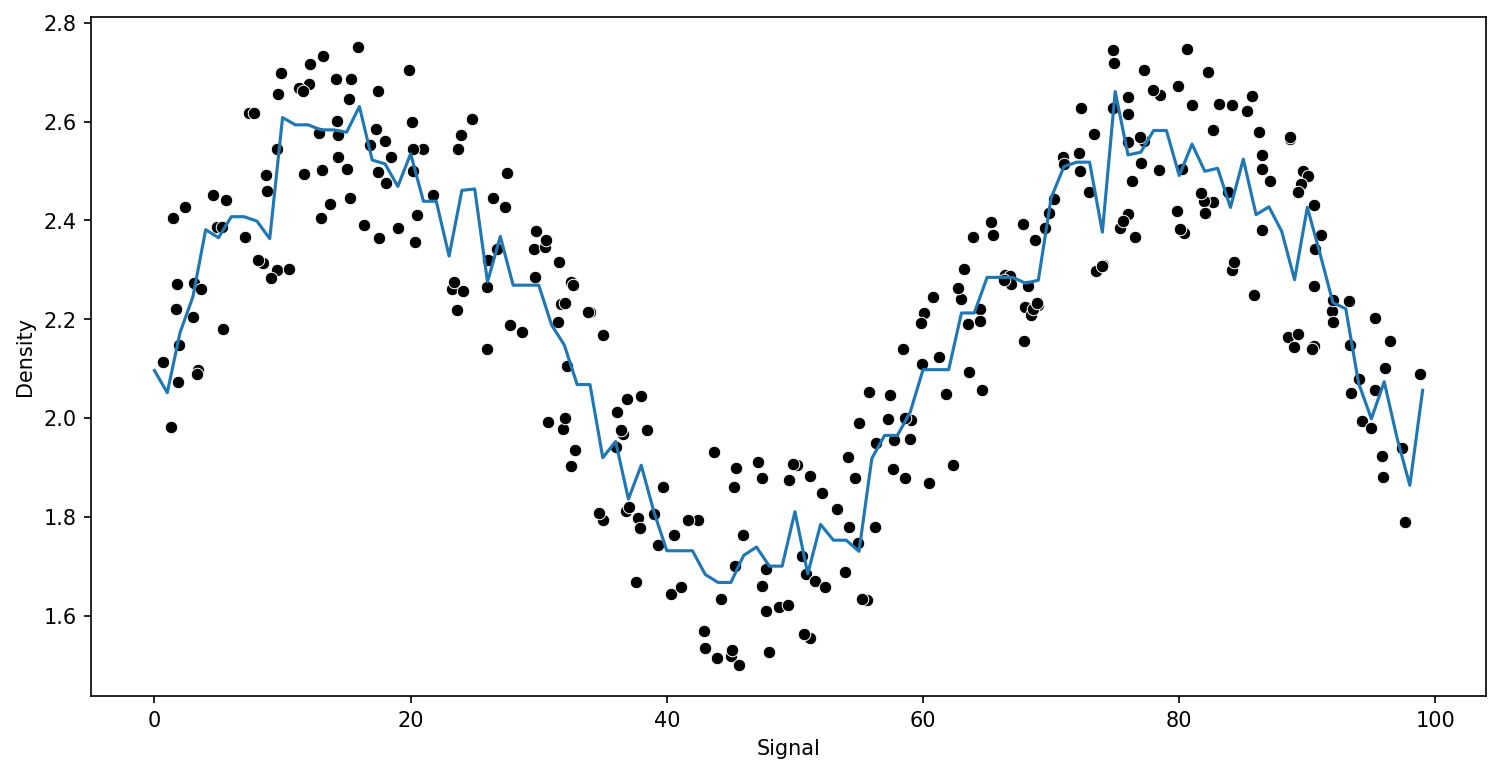

In [86]:
# aplicarea functiei executie_model asupra modelului GradientBoostingRegressor
executie_model(model7,X_train,y_train,X_test,y_test)

<a id='38'></a>
## 3.8. Algoritmul Adaboost

In [87]:
# importul algoritmului AdaBoostRegressor from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

In [88]:
# crearea modelului AdaBoostRegressor implicit model8= AdaBoostRegressor()
model8= AdaBoostRegressor()

RMSE : 0.14315203480823852


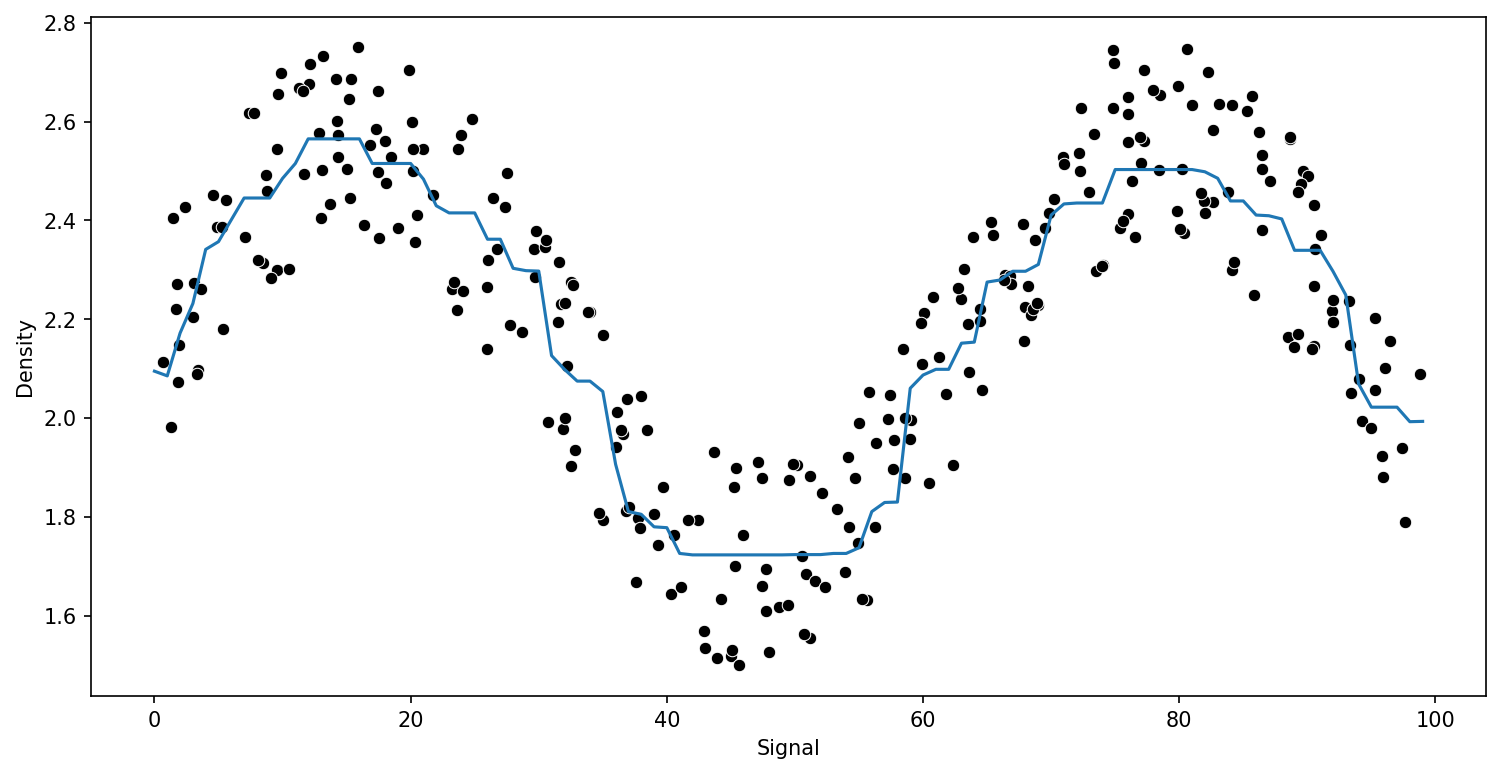

In [89]:
# aplicarea functiei executie_model asupra modelului AdaBoostRegressor
executie_model(model8,X_train,y_train,X_test,y_test)